In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
import math
import random
import json

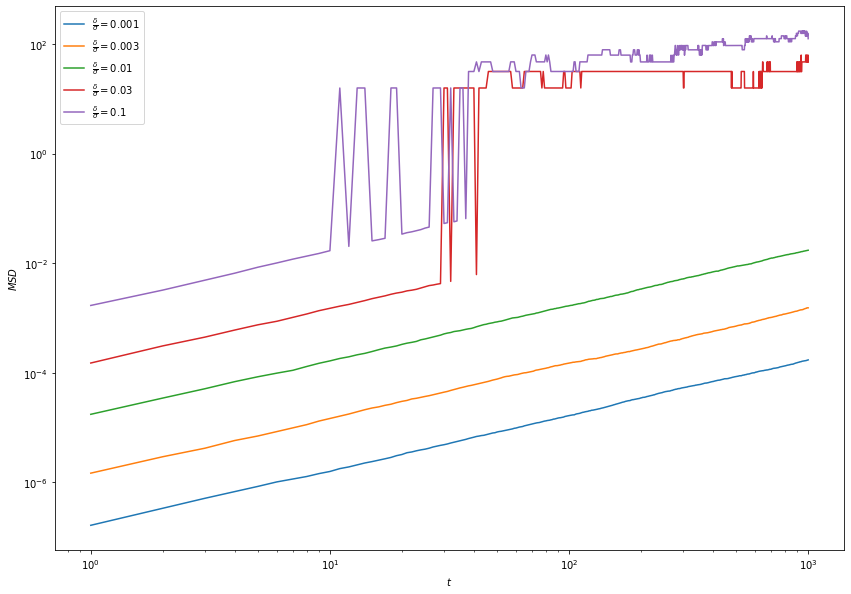

In [3]:
fig = plt.figure(figsize=(14.1421356, 10))
json_open1 = open('./values/output1.json', 'r')
json_load1 = json.load(json_open1)

msds = json_load1["msds"]
times = json_load1["times"]
mus = json_load1["mus"]

ax = [0]*2
# xlims = [(-6, 6), (-3.5, 3.5)]
for i in range(1):
    ax[i] = fig.add_subplot(1, 1, i+1)
    ax[i].set_xscale('log')
#     ax[i].set_xlim(0.8,1010)
#     ax[i].set_ylim(0.8,500)
    ax[i].set_yscale('log')
    
    for j in range(len(msds)-1):
        label = r"$\frac{\delta}{\sigma}=$"+str(mus[j]["Ratio"])
        ax[i].plot([k for k in range(1,times+1)], msds[j], label=label)
    
    ax[i].legend()
    ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")

656288
260146
63831


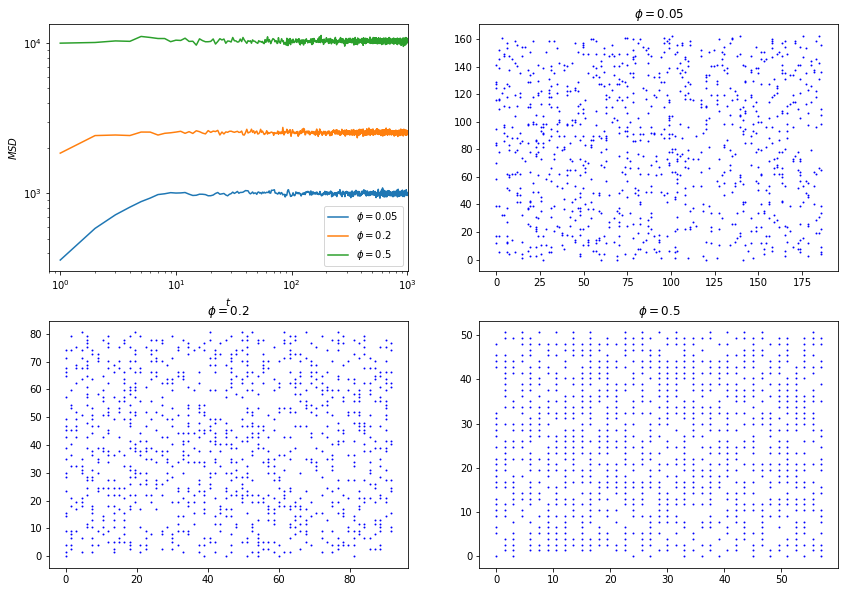

In [4]:
fig = plt.figure(figsize=(14.1421356, 10))
json_open = open('./values/problem2/output.json', 'r')
json_load = json.load(json_open)

msds = json_load["msds"]
times = json_load["times"]
mus = json_load["mus"]
phis = [0.05, 0.2, 0.5]
positions ={
    0.05: 2,
    0.2: 3,
    0.5: 4,
}


ax = [0]*(len(mus)+1)
# xlims = [(-6, 6), (-3.5, 3.5)]
for i in range(1):
    ax[i] = fig.add_subplot(2, 2, i+1)
    ax[i].set_xscale('log')
    ax[i].set_xlim(0.8,times+10)
    ax[i].set_yscale('log')
    
    for j in range(len(msds)):
        label = r"$\phi =$"+str(phis[j])
        ax[i].plot([k for k in range(1,times+1)], msds[j], label=label)
    
    ax[i].legend()
    ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")

for i in range(1,len(mus)+1):
    ax[i] = fig.add_subplot(2, 2, positions[mus[i-1]["Phi"]])
    title = r"$\phi = $" + str(mus[i-1]["Phi"])#+" "+str(mus[i-1]["Accepted"])
    # ax[i].set_xlim(0,10)
    # ax[i].set_ylim(0,10)
    for particle in mus[i-1]["Particles"]:
#         label = r"$\phi =$"+str(phis[j])
        ax[i].scatter(particle["X"], particle["Y"],color="blue", s=0.9)
    print(mus[i-1]["Denied"])
    ax[i].set_title(title)
#     ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")

17742938
486501
502572
478841
2350656


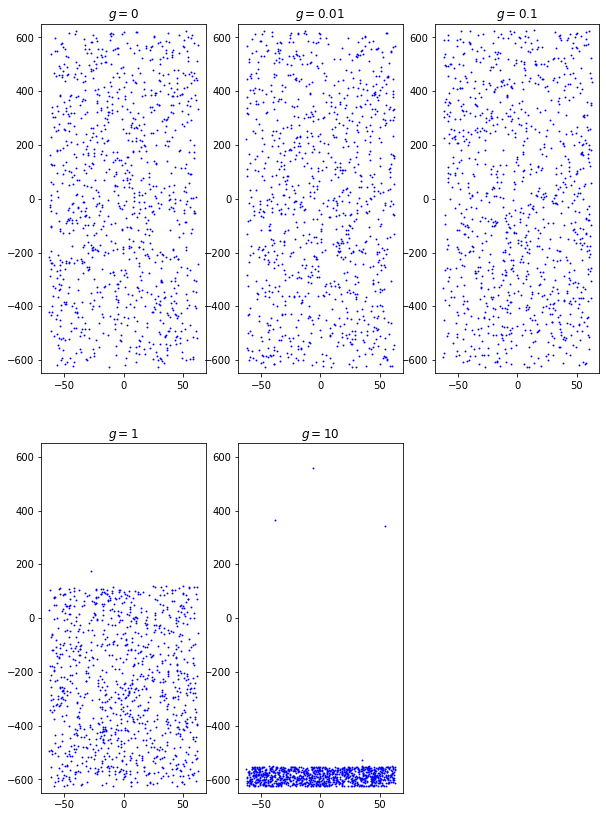

In [5]:
fig = plt.figure(figsize=(10,14.1421356))
json_open = open('./values/problem3/output.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

ax = [0]*(len(mus))

for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
#     ax[i].set_xlim(-20,20)
    ax[i].set_ylim(-650,650)
    title = r"$ g = $" + str(mus[i]["Gravity"])#+" "+str(mus[i-1]["Accepted"])
    for particle in mus[i]["Particles"]:
#         label = r"$\phi =$"+str(phis[j])
        ax[i].scatter(particle["X"], particle["Y"],color="blue", s=0.8)
    print(mus[i]["Denied"])
    ax[i].set_title(title)
#     ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")
fig.savefig("problem5.png")

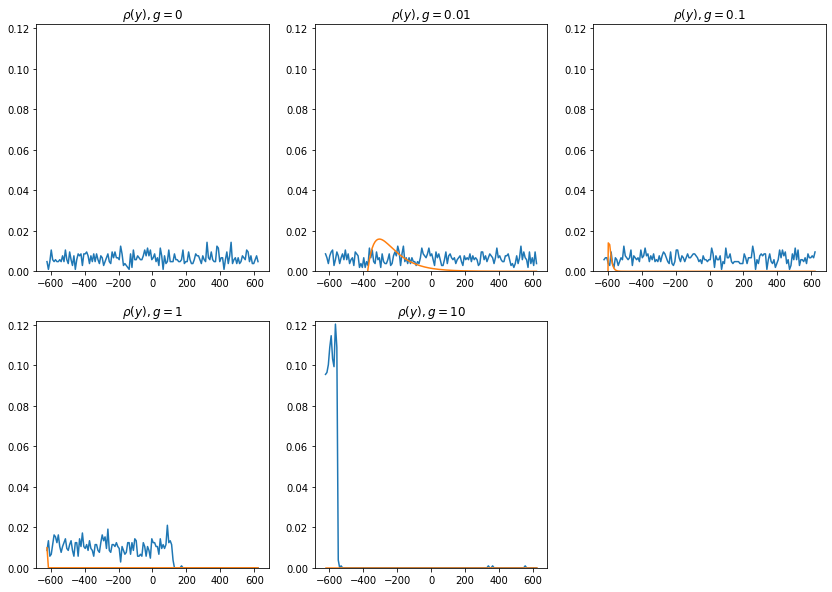

In [16]:
fig = plt.figure(figsize=(14.1421356,10))
json_open = open('./values/problem3/output.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
ax = [0]*(len(mus))
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

num_bins = 150
for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
    title = r"$\rho(y), g = $" + str(mus[i]["Gravity"])
    ax[i].set_ylim(0,0.122)
    mu = mus[i] 
    y = [particle["Y"] for particle in mu["Particles"]]
    
    bins = np.linspace(-mu["Ly"]/2, mu["Ly"]/2, num_bins + 1)
    particle_counts, _ = np.histogram(y, bins=bins)
    bin_width = mu["Ly"] / num_bins
    density = particle_counts / (bin_width * mu["Lx"])
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    theoretical_bins = np.linspace(0, mu["Ly"], num_bins + 1)
    theoretical_bin_centers = 0.5 * (theoretical_bins[1:] + theoretical_bins[:-1])
    rho_0 = len(mu["Particles"])/mu["Ly"]
    
    rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(1-(rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(mu["Sigma"]/2)**2*math.pi)/mu["Phi"])
    
    ax[i].plot(bin_centers, density)
    ax[i].plot(bin_centers, rho_theoretical, label="Theoretical Density Profile", linestyle='-')
    ax[i].set_title(title)
fig.savefig("problem6.png")

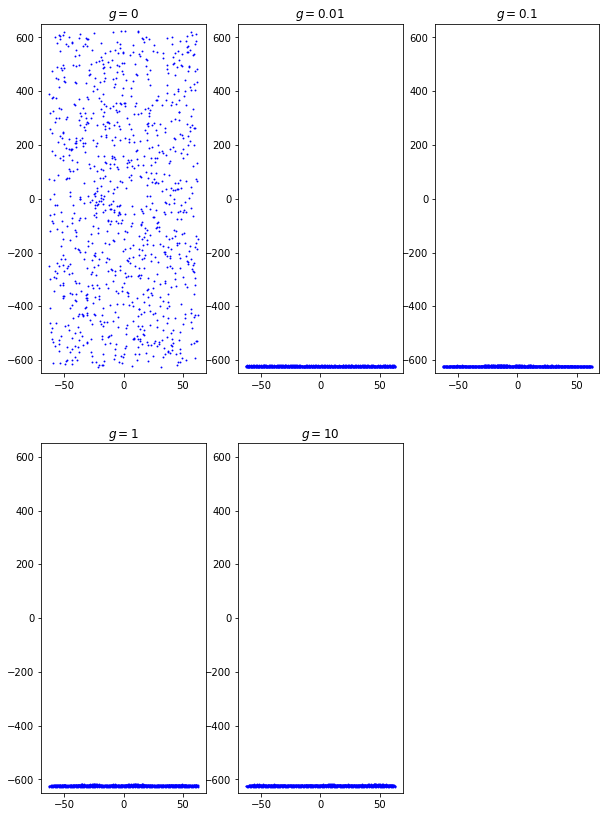

In [7]:
fig = plt.figure(figsize=(10,14.1421356))
json_open = open('./values/problem3_2/output.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

ax = [0]*(len(mus))

for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
#     ax[i].set_xlim(-20,20)
    ax[i].set_ylim(-650,650)
    title = r"$ g = $" + str(mus[i]["Gravity"])#+" "+str(mus[i-1]["Accepted"])
    for particle in mus[i]["Particles"]:
#         label = r"$\phi =$"+str(phis[j])
        ax[i].scatter(particle["X"], particle["Y"],color="blue", s=0.8)
    ax[i].set_title(title)
#     ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")

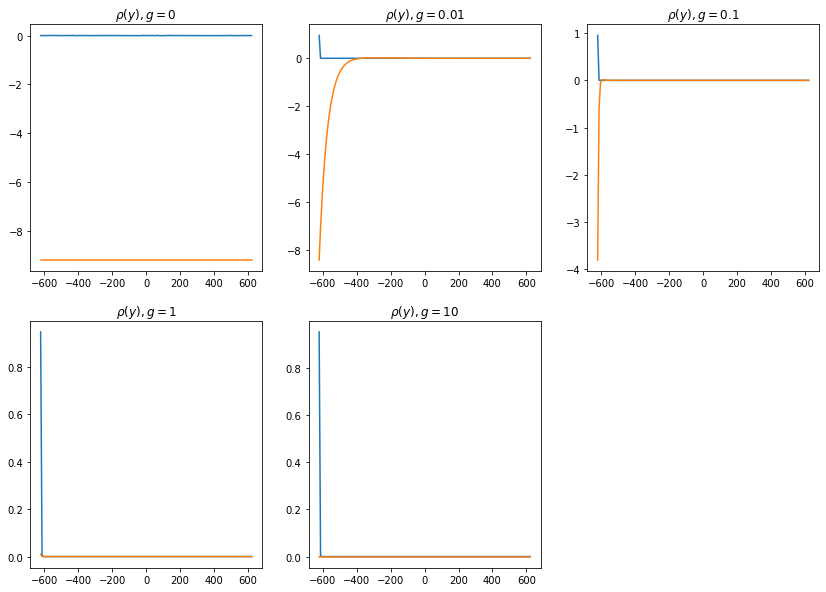

In [8]:
fig = plt.figure(figsize=(14.1421356,10))
json_open = open('./values/problem3_2/output.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
ax = [0]*(len(mus))
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

num_bins = 150
for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
    title = r"$\rho(y), g = $" + str(mus[i]["Gravity"])
    # ax[i].set_ylim(0,0.122)
    mu = mus[i] 
    y = [particle["Y"] for particle in mu["Particles"]]
    
    bins = np.linspace(-mu["Ly"]/2, mu["Ly"]/2, num_bins + 1)
    particle_counts, _ = np.histogram(y, bins=bins)
    bin_width = mu["Ly"] / num_bins
    density = particle_counts / (bin_width * mu["Lx"])
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    theoretical_bins = np.linspace(0, mu["Ly"], num_bins + 1)
    theoretical_bin_centers = 0.5 * (theoretical_bins[1:] + theoretical_bins[:-1])
    rho_0 = len(mu["Particles"])/mu["Ly"]
    
    rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(1-(rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(mu["Sigma"]/2)**2*math.pi)/mu["Phi"])
    
    ax[i].plot(bin_centers, density)
    ax[i].plot(bin_centers, rho_theoretical, label="Theoretical Density Profile", linestyle='-')
    ax[i].set_title(title)

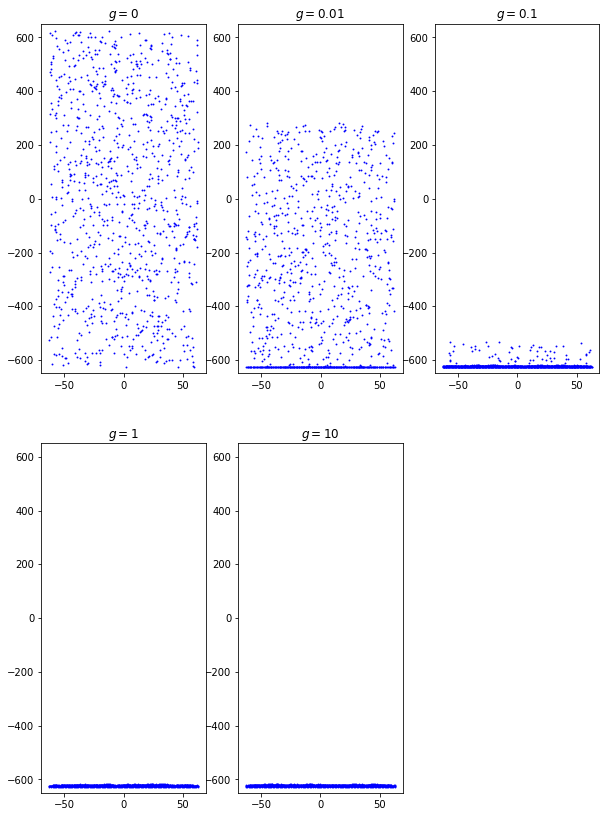

In [9]:
fig = plt.figure(figsize=(10,14.1421356))
json_open = open('./values/problem3_2/output3.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

ax = [0]*(len(mus))

for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
#     ax[i].set_xlim(-20,20)
    ax[i].set_ylim(-650,650)
    title = r"$ g = $" + str(mus[i]["Gravity"])#+" "+str(mus[i-1]["Accepted"])
    for particle in mus[i]["Particles"]:
#         label = r"$\phi =$"+str(phis[j])
        ax[i].scatter(particle["X"], particle["Y"],color="blue", s=0.8)
    ax[i].set_title(title)
#     ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")

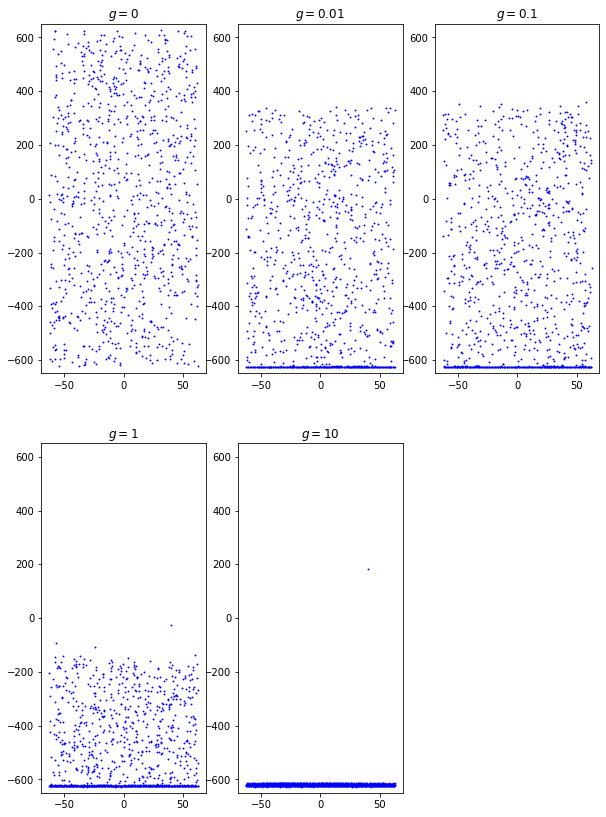

In [10]:
fig = plt.figure(figsize=(10,14.1421356))
json_open = open('./values/problem3/output_triangle.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

ax = [0]*(len(mus))

for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
#     ax[i].set_xlim(-20,20)
    ax[i].set_ylim(-650,650)
    title = r"$ g = $" + str(mus[i]["Gravity"])#+" "+str(mus[i-1]["Accepted"])
    for particle in mus[i]["Particles"]:
#         label = r"$\phi =$"+str(phis[j])
        ax[i].scatter(particle["X"], particle["Y"],color="blue", s=0.8)
    ax[i].set_title(title)
#     ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")

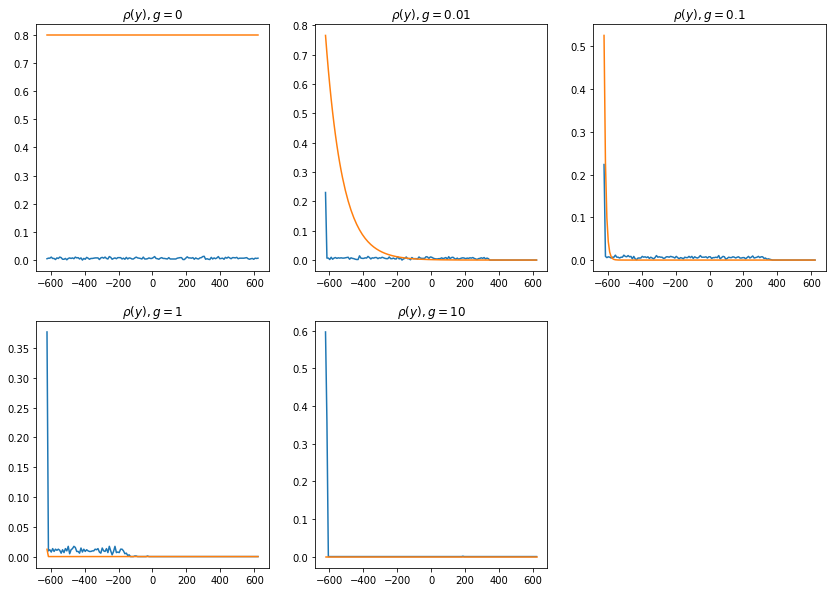

In [45]:
fig = plt.figure(figsize=(14.1421356,10))
json_open = open('./values/problem3/output_triangle.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
ax = [0]*(len(mus))
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

num_bins = 150
for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
    title = r"$\rho(y), g = $" + str(mus[i]["Gravity"])
    # ax[i].set_ylim(0,0.122)
    mu = mus[i] 
    y = [particle["Y"] for particle in mu["Particles"]]
    
    bins = np.linspace(-mu["Ly"]/2, mu["Ly"]/2, num_bins + 1)
    particle_counts, _ = np.histogram(y, bins=bins)
    bin_width = mu["Ly"] / num_bins
    density = particle_counts / (bin_width * mu["Lx"])
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    theoretical_bins = np.linspace(0, mu["Ly"], num_bins + 1)
    theoretical_bin_centers = 0.5 * (theoretical_bins[1:] + theoretical_bins[:-1])
    rho_0 = len(mu["Particles"])/mu["Ly"]
    
    # rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(1-(rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(mu["Sigma"]/2)**2*math.pi)/mu["Phi"])
    rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)
    
    
    ax[i].plot(bin_centers, density)
    ax[i].plot(bin_centers, rho_theoretical, label="Theoretical Density Profile", linestyle='-')
    ax[i].set_title(title)

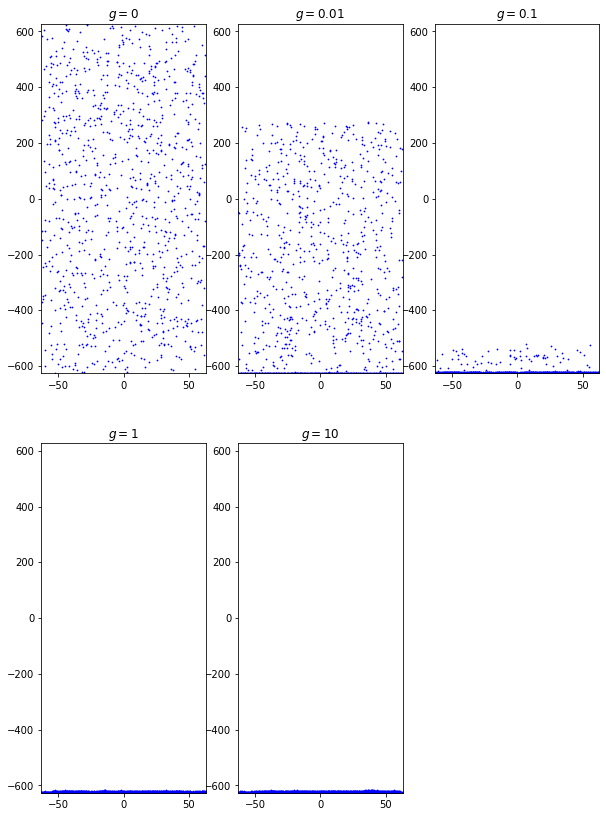

In [22]:
fig = plt.figure(figsize=(10,14.1421356))
json_open = open('./values/problem3/output_test.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

ax = [0]*(len(mus))

for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
    ax[i].set_xlim(-mus[i]["Lx"]/2, mus[i]["Lx"]/2)
    # print(mus[i]["Denied"])
    ax[i].set_ylim(-mus[i]["Ly"]/2, mus[i]["Ly"]/2)
    title = r"$ g = $" + str(mus[i]["Gravity"])#+" "+str(mus[i-1]["Accepted"])
    for particle in mus[i]["Particles"]:
#         label = r"$\phi =$"+str(phis[j])
        ax[i].scatter(particle["X"], particle["Y"],color="blue", s=0.6)
    # print(mus[i]["Denied"])
    ax[i].set_title(title)
#     ax[i].set(xlabel=r"$ t $", ylabel=r"$ MSD $")
fig.savefig("problem5_test.png")

0.09549296585513721 10
6.861055268871933e-20
0.09549296585513721 1
0.0014642436038293544
0.09549296585513721 0.1
0.06288333660071523
0.09549296585513721 0.01
0.09158572792817549
0.09549296585513721 0
0.09549296585513721


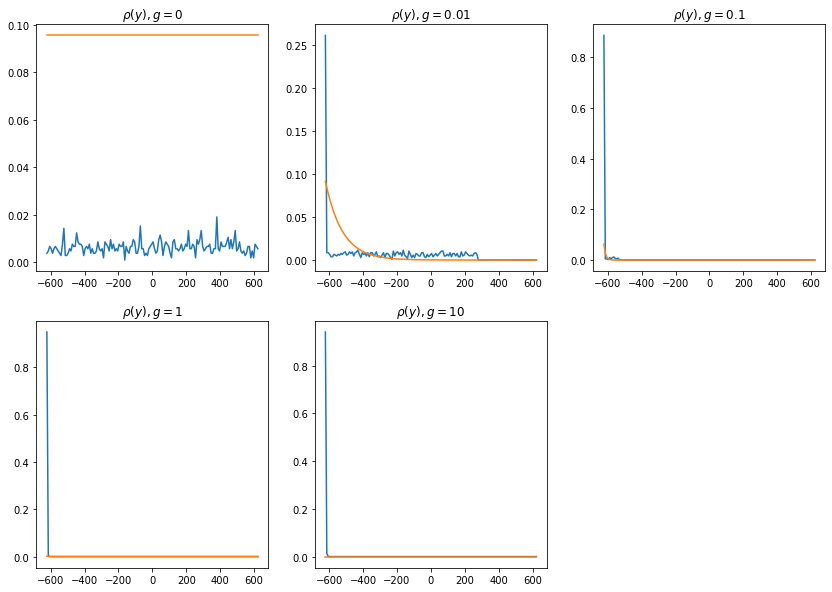

In [50]:
fig = plt.figure(figsize=(14.1421356,10))
json_open = open('./values/problem3/output_test.json', 'r')
json_load = json.load(json_open)

times = json_load["times"]
mus = json_load["mus"]
ax = [0]*(len(mus))
gravities = [0.0, 0.01, 0.1, 1, 10]
positions ={
    0.0: 1,
    0.01: 2,
    0.1: 3,
    1: 4,
    10: 5
}

num_bins = 150
for i in range(len(mus)):
    ax[i] = fig.add_subplot(2, 3, positions[mus[i]["Gravity"]])
    title = r"$\rho(y), g = $" + str(mus[i]["Gravity"])
    # ax[i].set_ylim(0,0.122)
    mu = mus[i] 
    y = [particle["Y"] for particle in mu["Particles"]]
    
    bins = np.linspace(-mu["Ly"]/2, mu["Ly"]/2, num_bins + 1)
    particle_counts, _ = np.histogram(y, bins=bins)
    bin_width = mu["Ly"] / num_bins
    density = particle_counts / (bin_width * mu["Lx"])
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    theoretical_bins = np.linspace(0, mu["Ly"], num_bins + 1)
    theoretical_bin_centers = 0.5 * (theoretical_bins[1:] + theoretical_bins[:-1])
    rho_0 = len(mu["Particles"])/(bin_width *mu["Ly"])
    
    # rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(1-(rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)*(mu["Sigma"]/2)**2*math.pi)/mu["Phi"])
    rho_theoretical = rho_0*np.exp(-mu["Gravity"] * theoretical_bin_centers)
    print(rho_0, str(mus[i]["Gravity"]))
    
    
    ax[i].plot(bin_centers, density)
    ax[i].plot(bin_centers, rho_theoretical, label="Theoretical Density Profile", linestyle='-')
    print(rho_theoretical[0])
    ax[i].set_title(title)

In [49]:
1000 / bin_width / 1253

0.09551690672021532